In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import PIL


In [2]:
print("Images in train:", len(os.listdir(path="D:\\diplom\\train_v2\\")))
print("Images in test:", len(os.listdir(path="D:\\diplom\\test_v2\\")))

print()

n_submit_images = pd.read_csv("D:\\diplom\\sample_submission_v2.csv").shape[0]
print(f"Images for submission: {n_submit_images}")

Images in train: 192557
Images in test: 15606

Images for submission: 15606


In [3]:
def load_df(file ="train"):
    
    df = pd.read_csv(f"D:\\diplom\\{file}_ship_segmentations_v2.csv")
    df['HasShip'] = df['EncodedPixels'].notnull()
    df = df.groupby("ImageId").agg({'HasShip': ['first', 'sum']})
    df.columns = ['HasShip', 'TotalShips']
    return df

In [4]:
def show_df(df):
    total = len(df)
    ship = df['HasShip'].sum()
    no_ship = total - ship
    total_ships = int(df['TotalShips'].sum())
    
    print(f"Изображений всего: {total} \nСудов всего: {total_ships}")
    print(f"Изображений, содержащих суда: {round(ship/total,2)} ({ship})")
    print(f"Изображений, не содержащих судов: {round(no_ship/total,2)} ({no_ship})")
    
    _, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), gridspec_kw = {'width_ratios':[1, 3]})
    
    ship_ratio = df['HasShip'].value_counts()
    ship_ratio = ship_ratio.rename(index={True: 'Есть суда', False: 'Нет судов'})
    ship_ratio.plot.bar(ax=axes[0], color=['red', 'lime'], rot=0, title="Распределение по содержанию")
    
    total_ships_distribution = df.loc[df['HasShip'], 'TotalShips'].value_counts().sort_index()
    total_ships_distribution.plot(kind='bar', ax=axes[1], rot=0, title="Распределение по количеству судов")

Изображений всего: 192556 
Судов всего: 81723
Изображений, содержащих суда: 0.22 (42556)
Изображений, не содержащих судов: 0.78 (150000)


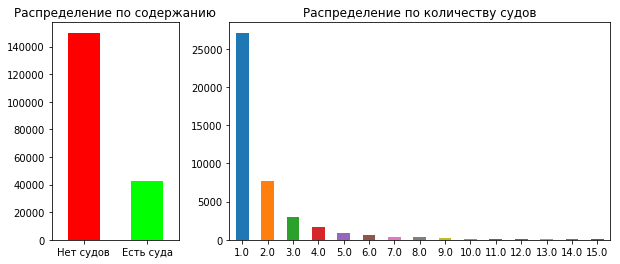

In [5]:
df_train = load_df("train")
show_df(df_train)

In [7]:
file = "train"
df_set = pd.read_csv(f"D:\\diplom\\{file}_ship_segmentations_v2.csv")
df_set['HasShip'] = df_set['EncodedPixels'].notnull()

sdf = df_set.loc[lambda df_set : df_set['HasShip'] == True].reset_index(drop=True)
ndf = df_set.loc[lambda df_set: df_set['HasShip'] == False].reset_index(drop=True)

n_sdf = sdf.values
n_sdf = np.hstack((n_sdf, np.zeros((n_sdf.shape[0],1))))

In [8]:
for i in range(len(n_sdf)):
    n_sdf[i,3] = np.fromstring(n_sdf[i][1], dtype=int, sep=' ')[1::2].sum()

In [9]:
n_sdf = n_sdf[n_sdf[:,3].argsort()][::-1]
n_sdf = pd.DataFrame({'ImageId':n_sdf[:,0], 'EncodedPixels':n_sdf[:,1], 'HasShip':n_sdf[:,2], 'Area':n_sdf[:,3]})

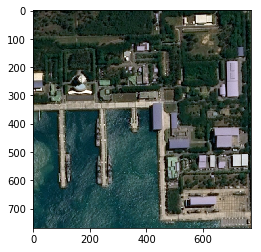

In [11]:
train_path = "D:\\diplom\\train_v2\\"
load_img = lambda filename: np.array(PIL.Image.open(train_path + filename))

img = load_img(n_sdf.loc[15000, 'ImageId'])
plt.imshow(img)

In [12]:
file = "un"
df_set = pd.read_csv(f"D:\\diplom\\{file}_ship_segmentations.csv")

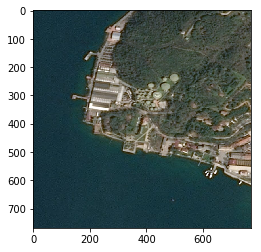

In [14]:
image_number = df_set.loc[df_set['ImageId']=='04c7a627f.jpg'].index[0]
img = load_img(df_set.loc[image_number, 'ImageId'])
plt.imshow(img)

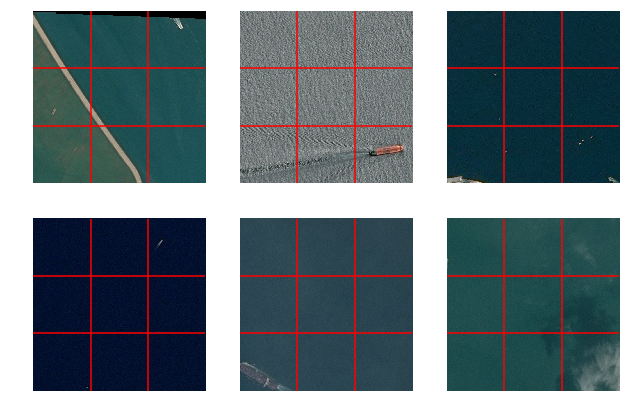

In [15]:
h = 2
w = 3

# names = np.array(['0005d01c8.jpg', '679ce6001.jpg', '8dfba7e05.jpg'])
indices = np.random.randint(0, 15000, h*w)

_, axes_list = plt.subplots(h, w, figsize=(3.5*w, 3.5*h))

i = 0 
for axes in axes_list:
    for ax in axes:
        image_number = indices[i]
        i += 1
        ax.axis('off')
        img = load_img(df_set.loc[image_number, 'ImageId'])
        ax.imshow(img)
        ax.hlines([256, 512], 0, 767, color='r')
        ax.vlines([256, 512], 0, 767, color='r')
        

In [16]:
# h = 15
# w = 4

# # names = np.array(['0005d01c8.jpg', '679ce6001.jpg', '8dfba7e05.jpg'])
# indices = np.random.randint(0, 150000, h*w)
# _, axes_list = plt.subplots(h, w, figsize=(3.5*w, 3.5*h))
# i = 0 
# for axes in axes_list:
#     for ax in axes:
#         image_number = indices[i]
#         i += 1
#         ax.axis('off')
#         img = load_img(ndf.loc[image_number, 'ImageId'])
#         ax.imshow(img)
#         ax.hlines([256, 512], 0, 767, color='r')
#         ax.vlines([256, 512], 0, 767, color='r')

In [17]:
indices = np.random.randint(0, 150000, 9)
indices

array([  1046,  74220,  98630, 140117,   1734, 125298,  52500, 144475,
        22279])

In [18]:
# n_sdf.loc[n_sdf['ImageId'] == '2cd190f17.jpg']
n_sdf.loc[(n_sdf['ImageId'] == '2cd190f17.jpg'), 'ImageId']

15000    2cd190f17.jpg
17800    2cd190f17.jpg
19233    2cd190f17.jpg
20390    2cd190f17.jpg
Name: ImageId, dtype: object

In [19]:
a = np.array([1,0,1,0,1,0])
a[1::2]


array([0, 0, 0])

In [20]:
# print('number of images:', len(os.listdir(path="D\diplom\positive_ext\")))
len(os.listdir(path="D\\diplom\\positive_ext\\"))

FileNotFoundError: [WinError 3] Системе не удается найти указанный путь: 'D\\diplom\\positive_ext\\'